In [1]:
import os

In [2]:
dataset_path='C:/Users/DELL/Downloads/ML_work_shop/CNN/'

In [3]:
num_cat_images = len(os.listdir(os.path.join(dataset_path, 'cat')))
num_dog_images = len(os.listdir(os.path.join(dataset_path, 'dog')))

In [4]:
print("Number of cat images:", num_cat_images)
print("Number of dog images:", num_dog_images)

Number of cat images: 349
Number of dog images: 363


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
labels = ['Cat', 'Dog']
counts = [num_cat_images, num_dog_images]

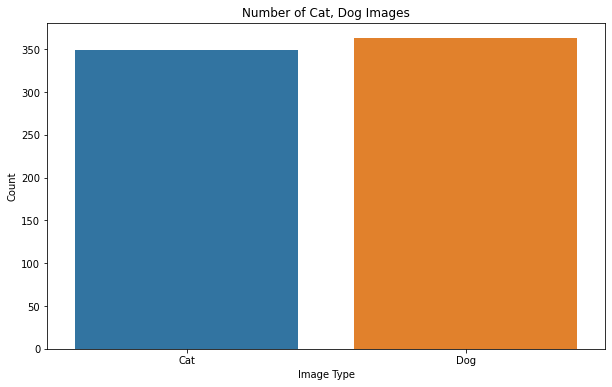

In [7]:
plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=counts)
plt.xlabel('Image Type')
plt.ylabel('Count')
plt.title('Number of Cat, Dog Images')
plt.show()

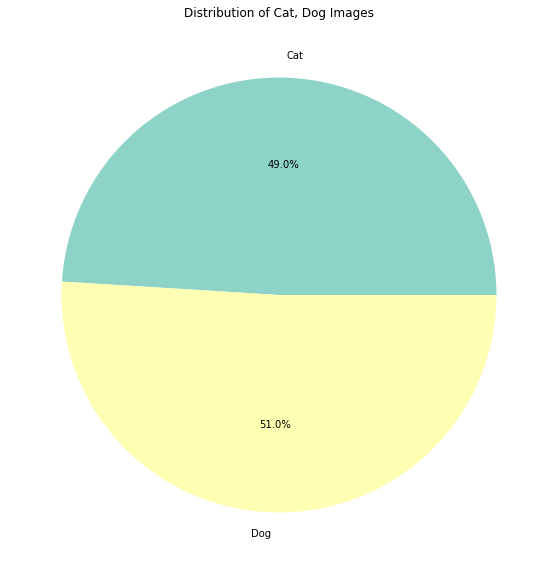

In [8]:
plt.figure(figsize=(10, 10))
sns.set_palette("Set3") 
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Cat, Dog Images')
plt.show()

In [9]:
import plotly.express as px

In [10]:
fig = px.bar(x=labels, y=counts)
fig.update_layout(
    xaxis_title='Image Type',
    yaxis_title='Count',
    title='Number of Cat, Dog Images',
    width=600,
    height=400
)
fig.show()

In [11]:
import plotly.graph_objects as go

In [12]:
fig = go.Figure(data=[go.Pie(labels=labels, values=counts, textinfo='percent', 
                             insidetextorientation='radial')])
fig.update_layout(
    title='Distribution of Cat, Dog Images',
    width=800,
    height=500
)
fig.show()

In [13]:
cat_path = os.path.join(dataset_path, 'cat')
dog_path = os.path.join(dataset_path, 'dog')

In [14]:
cat_files = os.listdir(cat_path)

In [15]:
import cv2

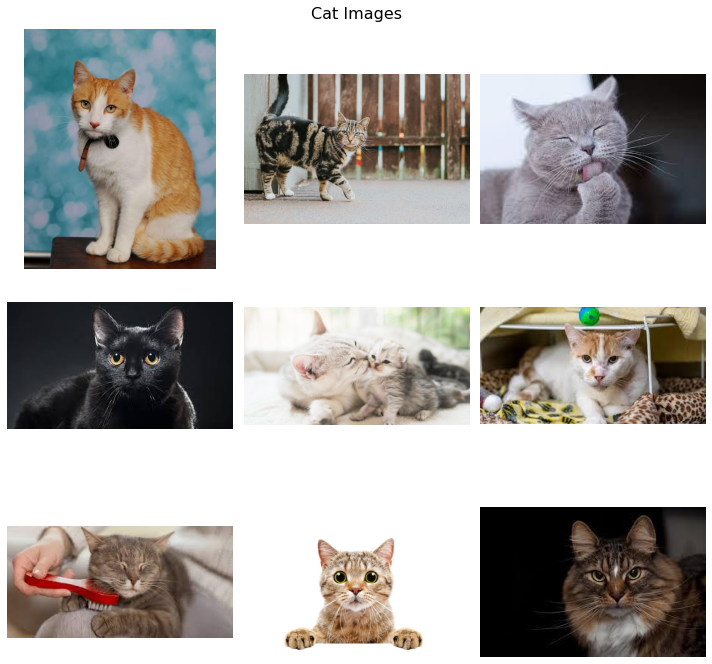

In [16]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Cat Images', fontsize=16)
axes = axes.ravel() # This line reshapes the 3x3 array of axes into a 1D array, making it easier to iterate over the subplots.

for i, image_file in enumerate(cat_files[:9]):
    image_path = os.path.join(cat_path, image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i].imshow(image)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [17]:
dog_files = os.listdir(dog_path)

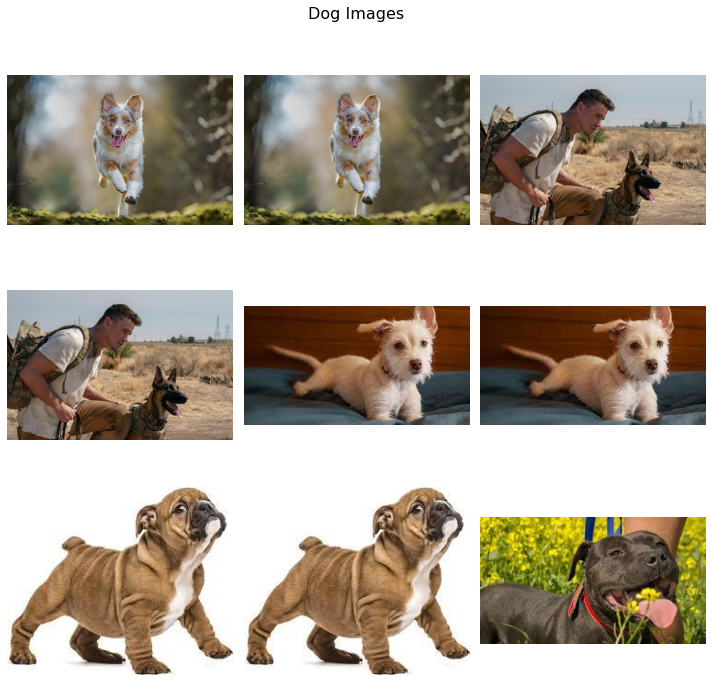

In [18]:
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Dog Images', fontsize=16)
axes = axes.ravel()

for i, image_file in enumerate(dog_files[:9]):
    image_path = os.path.join(dog_path, image_file)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i].imshow(image)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [19]:
def load_and_preprocess_images(image_folder):
    image_files = os.listdir(image_folder)
    images = []
    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)
        image = cv2.imread(image_path)
        if image is not None:
            image = cv2.resize(image, (256, 256))
            images.append(image)
    return images

In [20]:
cat_files = load_and_preprocess_images(os.path.join(dataset_path, 'cat'))
dog_files = load_and_preprocess_images(os.path.join(dataset_path, 'dog'))

In [21]:
import numpy as np

In [22]:
cat_files = np.array(cat_files).reshape(-1, 256, 256, 3)
dog_files = np.array(dog_files).reshape(-1, 256, 256, 3)
#-1,256,256,3
#dimension of image,width,height,color

In [23]:
all_files = np.concatenate((cat_files, dog_files), axis=0)
#axis=0 means row

In [24]:
all_labels = np.concatenate((
    np.zeros(len(cat_files)),
    np.ones(len(dog_files)),
))

In [25]:
all_files_flat = all_files.reshape(-1, all_files.shape[1] * all_files.shape[2] * all_files.shape[3])

In [26]:
cat_files_new = all_files_flat[all_labels == 0].reshape(-1, 256, 256, 3)
dog_files_new = all_files_flat[all_labels == 1].reshape(-1, 256, 256, 3)

print("Resampled cat files shape:", cat_files_new.shape)
print("Resampled dog files shape:", dog_files_new.shape)

Resampled cat files shape: (349, 256, 256, 3)
Resampled dog files shape: (363, 256, 256, 3)


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [28]:
cat_files_new = cat_files_new.astype('float32') / 255.0
dog_files_new = dog_files_new.astype('float32') / 255.0

In [29]:
image_shape = (256,256)

In [30]:
X = np.concatenate((cat_files_new, dog_files_new))
y = np.concatenate(([0]*349, [1]*363))

In [31]:
X_resized = np.array([cv2.resize(image, image_shape) for image in X])
X_flattened = X_resized.reshape(X_resized.shape[0], -1)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, 
                                                    test_size=0.2, 
                                                    stratify = y, 
                                                    random_state=42)

In [33]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [34]:
y_pred = svm_model.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.63


In [36]:
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

F1 Score: 0.6291893481915491
Precision: 0.6305498423145481
Recall: 0.6293706293706294
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.66      0.63        70
           1       0.65      0.60      0.62        73

    accuracy                           0.63       143
   macro avg       0.63      0.63      0.63       143
weighted avg       0.63      0.63      0.63       143

Confusion Matrix:
 [[46 24]
 [29 44]]


In [37]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [38]:
y_pred = rf_model.predict(X_test)

In [39]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.59


In [40]:
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:\n", classification_rep)
print("Confusion Matrix:\n", conf_matrix)

F1 Score: 0.5868472055522416
Precision: 0.5891078618351346
Recall: 0.5874125874125874
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.63      0.60        70
           1       0.61      0.55      0.58        73

    accuracy                           0.59       143
   macro avg       0.59      0.59      0.59       143
weighted avg       0.59      0.59      0.59       143

Confusion Matrix:
 [[44 26]
 [33 40]]


In [41]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator

In [42]:
model = Sequential()

In [43]:
model.add(Conv2D(32, (3, 3), 
                 activation='relu', 
                 kernel_initializer='he_uniform',
                 padding='same', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', 
                 kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform',
                 padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid')) 

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 18, 18, 128)       0

In [45]:
model.compile(optimizer=SGD(learning_rate=0.01),loss='binary_crossentropy', 
              metrics=['accuracy'])

In [46]:
full_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [47]:
full_data = full_datagen.flow_from_directory(
    'C:/Users/DELL/Downloads/ML_work_shop/CNN/',
    class_mode='binary',
    batch_size=64,
    target_size=(150, 150)
)

Found 712 images belonging to 4 classes.


In [48]:
history = model.fit(
    full_data,
    steps_per_epoch=len(full_data),
    validation_data=full_data, 
    validation_steps=len(full_data),  
    epochs = 50
)

Epoch 1/50
12/12 [==============================] - 67s 6s/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/50
12/12 [==============================] - 61s 5s/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/50
12/12 [==============================] - 61s 5s/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/50
12/12 [==============================] - 62s 5s/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/50
12/12 [==============================] - 61s 5s/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/50
12/12 [==============================] - 66s 6s/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/50
12/12 [==============================] - 30s 3s/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 

In [49]:
model.save('cats-vs-dogs.h5')

C:\Users\DELL\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



In [50]:
train_loss, train_accuracy = model.evaluate(full_data, steps=len(full_data))
print("Training Accuracy:", train_accuracy)

12/12 [==============================] - 12s 951ms/step - loss: nan - accuracy: 0.0000e+00
Training Accuracy: 0.0


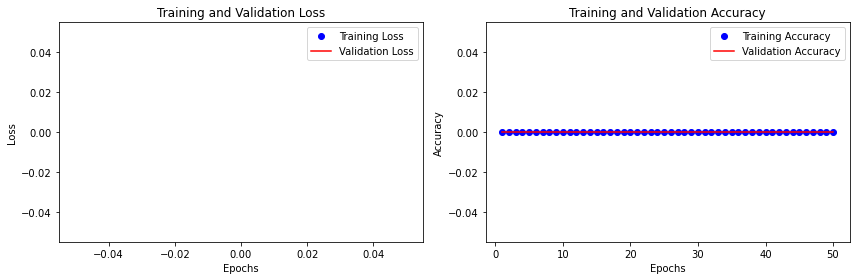

In [51]:
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, training_loss, 'bo', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, training_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()